# Formula 1 Analysis

In this notebook, we will try various analyses with F1 Data from Kaggle - [Formula 1 World Championship 1950 - 2023 Dataset](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020)



In [3]:
import warnings

# Import required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# ignore random API warnings
warnings.simplefilter("ignore")

## Description of our F1 Data.

The F1 data is structured across 14 files from [Kaggle](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020)

+ Circuits - Descriptive Information about F1 Circuits from 1950 - 2023
+ Seasons - Just a simple file of each season year
+ Races - Information on each race and date it was held and circuit it was held on.
+ Constructors - Descriptive Information about each F1 Team
+ Constructor Results - Race results for each Constructor (Manufacturer).
+ Constructor Standings - The positional standing of the constructor after each race; cyclical - repeats every year.
+ Drivers - A descriptive file about the Drivers, including name, dob, nationality
+ Results - Results of each driver for every race, including fastest times, speed, laps and race result.
+ Drivers Standings - The positional standing of drivers after each race, including number of wins; cyclical - resets and repeats every year
+ Qualifying - Results of qualitfying for each driver, for each race or each of Q1, Q2 and Q3 sessions.
+ Lap Times - Time and position for each lap of every race
+ Pit Stops - Pit Stops for most races; Stop number and stop times (not for all races)
+ Sprint Results - A short format race on the day of qualifying; generally orthogonal to the rest of the data (*we won't use it for our analysis*)
+ Status - Description of Race status codes for driviers (Finished, DNF, Mech Failure etc.)

In addition to the above, we created a new file from a different data source on Wikipedia - [List of Formula 1 Circuits](https://en.wikipedia.org/wiki/List_of_Formula_One_circuits) to get more details on the circuit type information.  This will be used to predict if a circuit is **Street Circuit** or a **Track Circuit** based on various characteristics that we can observe.  This data is represented in the following file:
+ Circuits Info - Additional Descriptive Information about Formula 1 Circuits including whether a circuit is a street or a track circuit

## Load and review all the Data

Let's read all the files and review their makeup via display and describe.


### Circuits

In [4]:
# Load and review circuit related information
circuits_df = pd.read_csv("data/circuits.csv")
print("Circuits")
display(circuits_df)
display(circuits_df.describe().T)
circuits_info_df = pd.read_csv("data/circuits_info.csv")
print("Circuits Info")
display(circuits_info_df)
display(circuits_info_df.describe().T)

Circuits


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,25,galvez,Autódromo Juan y Oscar Gálvez,Buenos Aires,Argentina,-34.6943,-58.4593,8,http://en.wikipedia.org/wiki/Aut%C3%B3dromo_Os...
1,29,adelaide,Adelaide Street Circuit,Adelaide,Australia,-34.9272,138.6170,58,http://en.wikipedia.org/wiki/Adelaide_Street_C...
2,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
3,70,red_bull_ring,Red Bull Ring,Spielberg,Austria,47.2197,14.7647,678,http://en.wikipedia.org/wiki/Red_Bull_Ring
4,57,zeltweg,Zeltweg,Styria,Austria,47.2039,14.7478,676,http://en.wikipedia.org/wiki/Zeltweg_Airfield
...,...,...,...,...,...,...,...,...,...
72,79,miami,Miami International Autodrome,Miami,USA,25.9581,-80.2389,\N,http://en.wikipedia.org/wiki/Miami_Internation...
73,33,phoenix,Phoenix street circuit,Phoenix,USA,33.4479,-112.0750,345,http://en.wikipedia.org/wiki/Phoenix_street_ci...
74,60,riverside,Riverside International Raceway,California,USA,33.9370,-117.2730,470,http://en.wikipedia.org/wiki/Riverside_Interna...
75,63,sebring,Sebring International Raceway,Florida,USA,27.4547,-81.3483,18,http://en.wikipedia.org/wiki/Sebring_Raceway


,count,mean,std,min,25%,50%,75%,max
circuitId,77.0,39.883117,23.001701,1.0000,20.00000,40.00000,59.0000,80.0000
lat,77.0,33.442925,22.808866,-37.8497,32.77740,40.95170,46.9589,57.2653
lng,77.0,1.076683,65.516951,-118.1890,-9.39417,3.93083,19.2486,144.9680


Circuits Info


,Circuit,circuitRef,Circuit_fixed,Current,Type,Direction,Location,Country,Last length used,Grands Prix,Season(s),Grands Prix held
0,Autódromo Juan y Oscar Gálvez,galvez,Autódromo Juan y Oscar Gálvez,0,Race circuit,Clockwise,Buenos Aires,Argentina,4.259 km (2.646 mi),Argentine Grand Prix,"1953–1958, 1960, 1972–1975, 1977–1981, 1995–1998",20
1,Adelaide Street Circuit,adelaide,Adelaide Street Circuit,0,Street circuit,Clockwise,Adelaide,Australia,3.780 km (2.349 mi),Australian Grand Prix,1985–1995,11
2,Albert Park Circuit ✔,albert_park,Albert Park Circuit,1,Street circuit,Clockwise,Melbourne,Australia,5.278 km (3.280 mi),Australian Grand Prix,"1996–2019, 2022–2023",26
3,Red Bull Ring ✔,red_bull_ring,Red Bull Ring,1,Race circuit,Clockwise,Spielberg,Austria,4.318 km (2.683 mi),"Austrian Grand Prix,","1970–1987, 1997–2003, 2014–2023[c]",35
4,Zeltweg Airfield,zeltweg,Zeltweg Airfield,0,Road circuit,Clockwise,Zeltweg,Austria,3.186 km (1.980 mi),Austrian Grand Prix,1964,1
...,...,...,...,...,...,...,...,...,...,...,...,...
72,Phoenix Street Circuit,phoenix,Phoenix Street Circuit,0,Street circuit,Anti-clockwise,Phoenix,United States,3.720 km (2.312 mi),United States Grand Prix,1989–1991,3
73,Riverside International Raceway,riverside,Riverside International Raceway,0,Race circuit,Clockwise,Moreno Valley,United States,5.271 km (3.275 mi),United States Grand Prix,1960,1
74,Sebring Raceway,sebring,Sebring Raceway,0,Road circuit,Clockwise,Sebring,United States,8.356 km (5.192 mi),United States Grand Prix,1959,1
75,Las Vegas Strip Circuit ✔,vegas,Las Vegas Strip Circuit,1,Street circuit,Anti-clockwise,Paradise,United States,6.120 km (3.803 mi),Las Vegas Grand Prix,2023[11],0


,count,mean,std,min,25%,50%,75%,max
Current,77.0,0.285714,0.454716,0.0,0.0,0.0,1.0,1.0
Grands Prix held,77.0,13.324675,16.207894,0.0,2.0,7.0,19.0,72.0


### Seasons and Races

In [5]:
# Load and review Season and Race information
seasons_df = pd.read_csv('data/seasons.csv')
print("Seasons")
display(seasons_df)
display(seasons_df.describe().T)
races_df = pd.read_csv('data/races.csv')
print("Races")
display(races_df)
display(races_df.describe().T)

Seasons


,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...
3,2006,http://en.wikipedia.org/wiki/2006_Formula_One_...
4,2005,http://en.wikipedia.org/wiki/2005_Formula_One_...
...,...,...
69,2019,http://en.wikipedia.org/wiki/2019_Formula_One_...
70,2020,http://en.wikipedia.org/wiki/2020_Formula_One_...
71,2021,http://en.wikipedia.org/wiki/2021_Formula_One_...
72,2022,http://en.wikipedia.org/wiki/2022_Formula_One_...


,count,mean,std,min,25%,50%,75%,max
year,74.0,1986.5,21.505813,1950.0,1968.25,1986.5,2004.75,2023.0


Races


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1116,2023,19,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1098,1117,2023,20,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1099,1118,2023,21,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1100,1119,2023,22,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


,count,mean,std,min,25%,50%,75%,max
raceId,1102.0,553.853902,321.706151,1.0,276.25,551.5,826.75,1120.0
year,1102.0,1992.049002,20.308639,1950.0,1976.00,1994.0,2010.00,2023.0
round,1102.0,8.507260,5.097545,1.0,4.00,8.0,12.00,23.0
circuitId,1102.0,23.697822,19.337398,1.0,9.00,18.0,34.00,80.0


## Results

In [6]:
results_df = pd.read_csv("data/results.csv")
print("Driver Results")
display(results_df)
display(results_df.describe().T)

Driver Results


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,57,\N,\N,39,12,1:29.833,211.632,11
25836,25842,1096,825,210,20,16,17,17,17,0.0,57,\N,\N,40,20,1:31.158,208.556,11
25837,25843,1096,1,131,44,5,18,18,18,0.0,55,\N,\N,42,11,1:29.788,211.738,9
25838,25844,1096,849,3,6,20,19,19,19,0.0,55,\N,\N,45,14,1:30.309,210.517,130


,count,mean,std,min,25%,50%,75%,max
resultId,25840.0,12921.334327,7460.682031,1.0,6460.75,12920.5,19380.25,25845.0
raceId,25840.0,531.425813,299.440908,1.0,293.00,514.0,784.00,1096.0
driverId,25840.0,261.732082,268.623016,1.0,56.00,163.0,360.00,856.0
constructorId,25840.0,48.628328,59.732131,1.0,6.00,25.0,58.00,214.0
grid,25840.0,11.179063,7.243725,0.0,5.00,11.0,17.00,34.0
positionOrder,25840.0,12.876006,7.712391,1.0,6.00,12.0,18.00,39.0
points,25840.0,1.877053,4.169849,0.0,0.00,0.0,2.00,50.0
laps,25840.0,45.977515,29.808951,0.0,22.00,52.0,66.00,200.0
statusId,25840.0,17.568692,26.155476,1.0,1.00,11.0,14.00,141.0


## Circuit Segmentation

For this first exercise. We will try to segment our circuits into *street circuits* and *track circuits* using various segmentation algorithms.

First we have to prepare the dataset.  We need to combine our new data source with the main dataset.


In [7]:
# Just get the 'Type' feature from the circuit info data
merged_circuits_df = pd.merge(circuits_df,
                              circuits_info_df[['circuitRef','Type']],
                              on = "circuitRef")
display(merged_circuits_df)

,circuitId,circuitRef,name,location,country,lat,lng,alt,url,Type
0,25,galvez,Autódromo Juan y Oscar Gálvez,Buenos Aires,Argentina,-34.6943,-58.4593,8,http://en.wikipedia.org/wiki/Aut%C3%B3dromo_Os...,Race circuit
1,29,adelaide,Adelaide Street Circuit,Adelaide,Australia,-34.9272,138.6170,58,http://en.wikipedia.org/wiki/Adelaide_Street_C...,Street circuit
2,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Street circuit
3,70,red_bull_ring,Red Bull Ring,Spielberg,Austria,47.2197,14.7647,678,http://en.wikipedia.org/wiki/Red_Bull_Ring,Race circuit
4,57,zeltweg,Zeltweg,Styria,Austria,47.2039,14.7478,676,http://en.wikipedia.org/wiki/Zeltweg_Airfield,Road circuit
...,...,...,...,...,...,...,...,...,...,...
72,79,miami,Miami International Autodrome,Miami,USA,25.9581,-80.2389,\N,http://en.wikipedia.org/wiki/Miami_Internation...,Street circuit
73,33,phoenix,Phoenix street circuit,Phoenix,USA,33.4479,-112.0750,345,http://en.wikipedia.org/wiki/Phoenix_street_ci...,Street circuit
74,60,riverside,Riverside International Raceway,California,USA,33.9370,-117.2730,470,http://en.wikipedia.org/wiki/Riverside_Interna...,Race circuit
75,63,sebring,Sebring International Raceway,Florida,USA,27.4547,-81.3483,18,http://en.wikipedia.org/wiki/Sebring_Raceway,Road circuit


In [8]:
#races_type_df = races_type_df.raceId.astype(int)
races_circuits_df = pd.merge(races_df,
                             merged_circuits_df[['circuitRef','circuitId','Type']],
                             on = 'circuitId')
races_circuits_df

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,circuitRef,Type
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,albert_park,Street circuit
1,18,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,albert_park,Street circuit
2,36,2007,1,1,Australian Grand Prix,2007-03-18,03:00:00,http://en.wikipedia.org/wiki/2007_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,albert_park,Street circuit
3,55,2006,3,1,Australian Grand Prix,2006-04-02,14:00:00,http://en.wikipedia.org/wiki/2006_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,albert_park,Street circuit
4,71,2005,1,1,Australian Grand Prix,2005-03-06,14:00:00,http://en.wikipedia.org/wiki/2005_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,albert_park,Street circuit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1075,2022,2,77,Saudi Arabian Grand Prix,2022-03-27,17:00:00,http://en.wikipedia.org/wiki/2022_Saudi_Arabia...,2022-03-25,14:00:00,2022-03-25,17:00:00,2022-03-26,14:00:00,2022-03-26,17:00:00,\N,\N,jeddah,Street circuit
1098,1099,2023,2,77,Saudi Arabian Grand Prix,2023-03-19,17:00:00,https://en.wikipedia.org/wiki/2023_Saudi_Arabi...,2023-03-17,13:30:00,2023-03-17,17:00:00,2023-03-18,13:30:00,2023-03-18,17:00:00,\N,\N,jeddah,Street circuit
1099,1078,2022,5,79,Miami Grand Prix,2022-05-08,19:30:00,http://en.wikipedia.org/wiki/2022_Miami_Grand_...,2022-05-06,18:30:00,2022-05-06,21:30:00,2022-05-07,17:00:00,2022-05-07,20:00:00,\N,\N,miami,Street circuit
1100,1102,2023,5,79,Miami Grand Prix,2023-05-07,19:30:00,https://en.wikipedia.org/wiki/2023_Miami_Grand...,2023-05-05,17:30:00,2023-05-05,21:00:00,2023-05-06,16:30:00,2023-05-06,20:00:00,\N,\N,miami,Street circuit


In [9]:
results_circuit_df = pd.merge(results_df,
                              races_circuits_df[['raceId','circuitId','Type']],
                              on = 'raceId')
results_circuit_df
results_circuit_df.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
circuitId            int64
Type                object
dtype: object

In [10]:
convert = ['number','position','milliseconds','fastestLap','rank','fastestLapSpeed']
for item in convert:
    results_circuit_df[item] = pd.to_numeric(results_circuit_df[item],
                                                     errors="coerce")

display(results_circuit_df.dtypes)
results_circuit_df


resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number             float64
grid                 int64
position           float64
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds       float64
fastestLap         float64
rank               float64
fastestLapTime      object
fastestLapSpeed    float64
statusId             int64
circuitId            int64
Type                object
dtype: object

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,circuitId,Type
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1,1,Street circuit
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,1,1,Street circuit
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,1,1,Street circuit
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,1,1,Street circuit
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,1,1,Street circuit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47.0,12,16.0,16,16,0.0,57,\N,NaN,39.0,12.0,1:29.833,211.632,11,24,Race circuit
25836,25842,1096,825,210,20.0,16,17.0,17,17,0.0,57,\N,NaN,40.0,20.0,1:31.158,208.556,11,24,Race circuit
25837,25843,1096,1,131,44.0,5,18.0,18,18,0.0,55,\N,NaN,42.0,11.0,1:29.788,211.738,9,24,Race circuit
25838,25844,1096,849,3,6.0,20,19.0,19,19,0.0,55,\N,NaN,45.0,14.0,1:30.309,210.517,130,24,Race circuit


In [11]:
results_circuit_df.milliseconds.count()
df = results_circuit_df
df.groupby('Type').describe().T

Type             Race circuit  Road circuit  Street circuit
resultId  count  20245.000000    759.000000     4836.000000
          mean   12804.453989  18407.370224    12549.610008
          std     7485.558674   1212.797088     7596.298471
          min       23.000000  15442.000000        1.000000
          25%     6232.000000  17714.500000     6485.750000
...                       ...           ...             ...
circuitId min        2.000000     51.000000        1.000000
          25%       11.000000     55.000000        6.000000
          50%       19.000000     55.000000        7.000000
          75%       34.000000     58.000000       29.000000
          max       78.000000     66.000000       79.000000

[128 rows x 3 columns]

In [12]:
def numeric_type(data):
    """
    Convert Type into a numeric representation
        0 - Race Circuit
        1 - Street Circuit
        2 - Road Circuit
    """

    map_type = {'Race circuit': 0,'Street circuit': 1,'Road circuit': 2}
    data['Type'] = data['Type'].map(map_type)
    data['Type'].astype(int)

def non_finish_counts(data):
    """
    Add a feature to encomapss the number of non finishers in a race.

    :param data: The Dataframe being manipulated
    :return: return the dataframe
    """

    nfcounts = data[data['statusId'] != 1].groupby('raceId').size().reset_index(name='nonfinisherCount')
    new_df = data[data['position'] == 1]
    result = new_df.merge(nfcounts,on="raceId",how="left")
    return result

In [13]:
df_gt = df[["raceId","position","laps","fastestLapSpeed",
            "milliseconds","statusId","Type","circuitId"]]
numeric_type(df_gt)
df_gt = non_finish_counts(df_gt)
df_gt.groupby('Type').describe().T

Type                             0           1           2
raceId           count  843.000000  202.000000   37.000000
                 mean   536.660735  528.014851  761.297297
                 std    315.982123  322.320033   55.360367
                 min      2.000000    1.000000  625.000000
                 25%    260.000000  273.500000  732.000000
...                            ...         ...         ...
nonfinisherCount min      1.000000    3.000000   10.000000
                 25%     12.000000   12.000000   15.000000
                 50%     17.000000   18.000000   18.000000
                 75%     22.000000   23.000000   20.000000
                 max     38.000000   36.000000   27.000000

[64 rows x 3 columns]

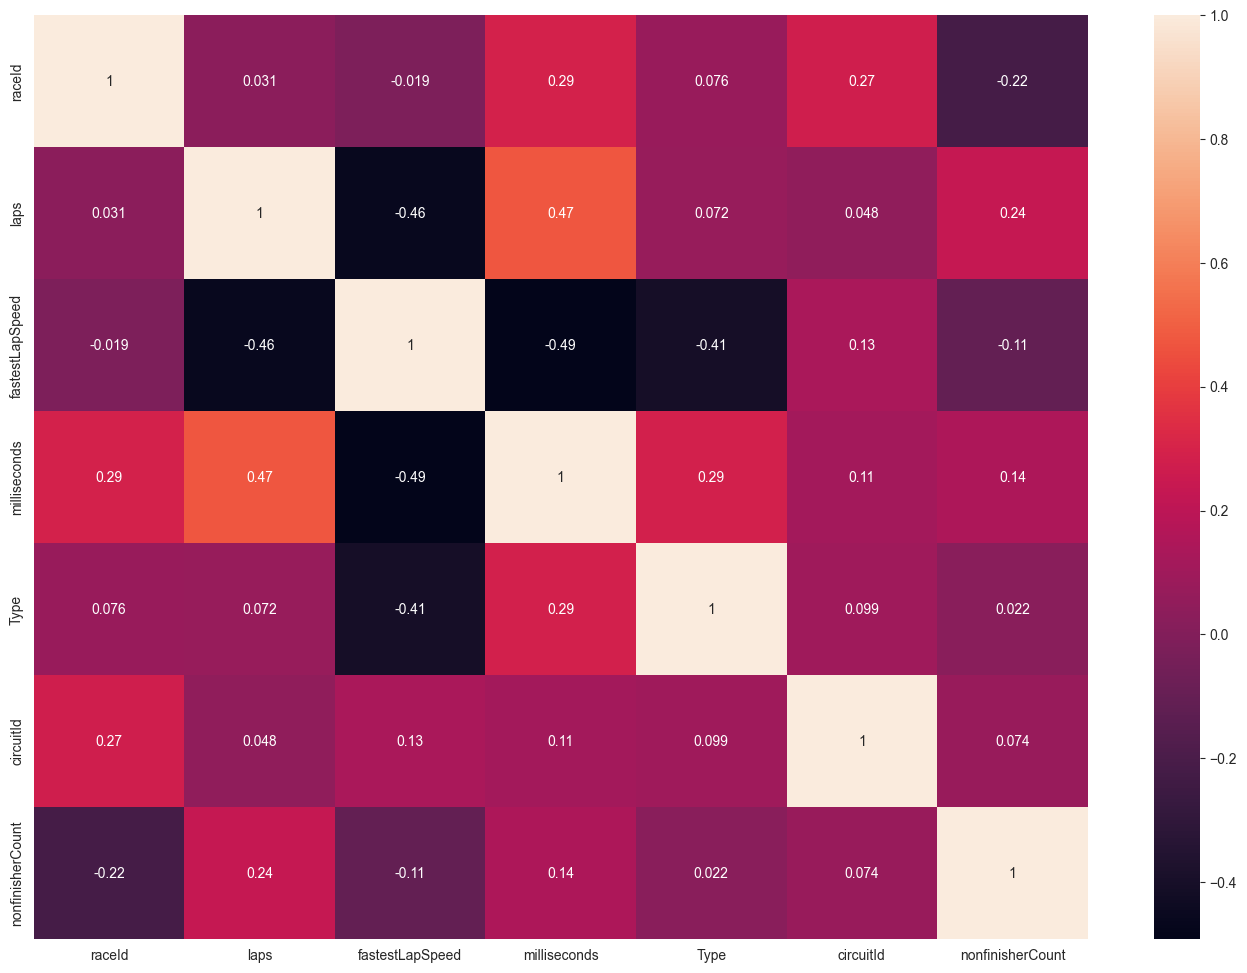

In [14]:
df_gt = df_gt.drop(["position","statusId"],axis=1)
plt.figure(figsize=(17,12))
sns.heatmap(df_gt.corr(),annot=True)
plt.show()

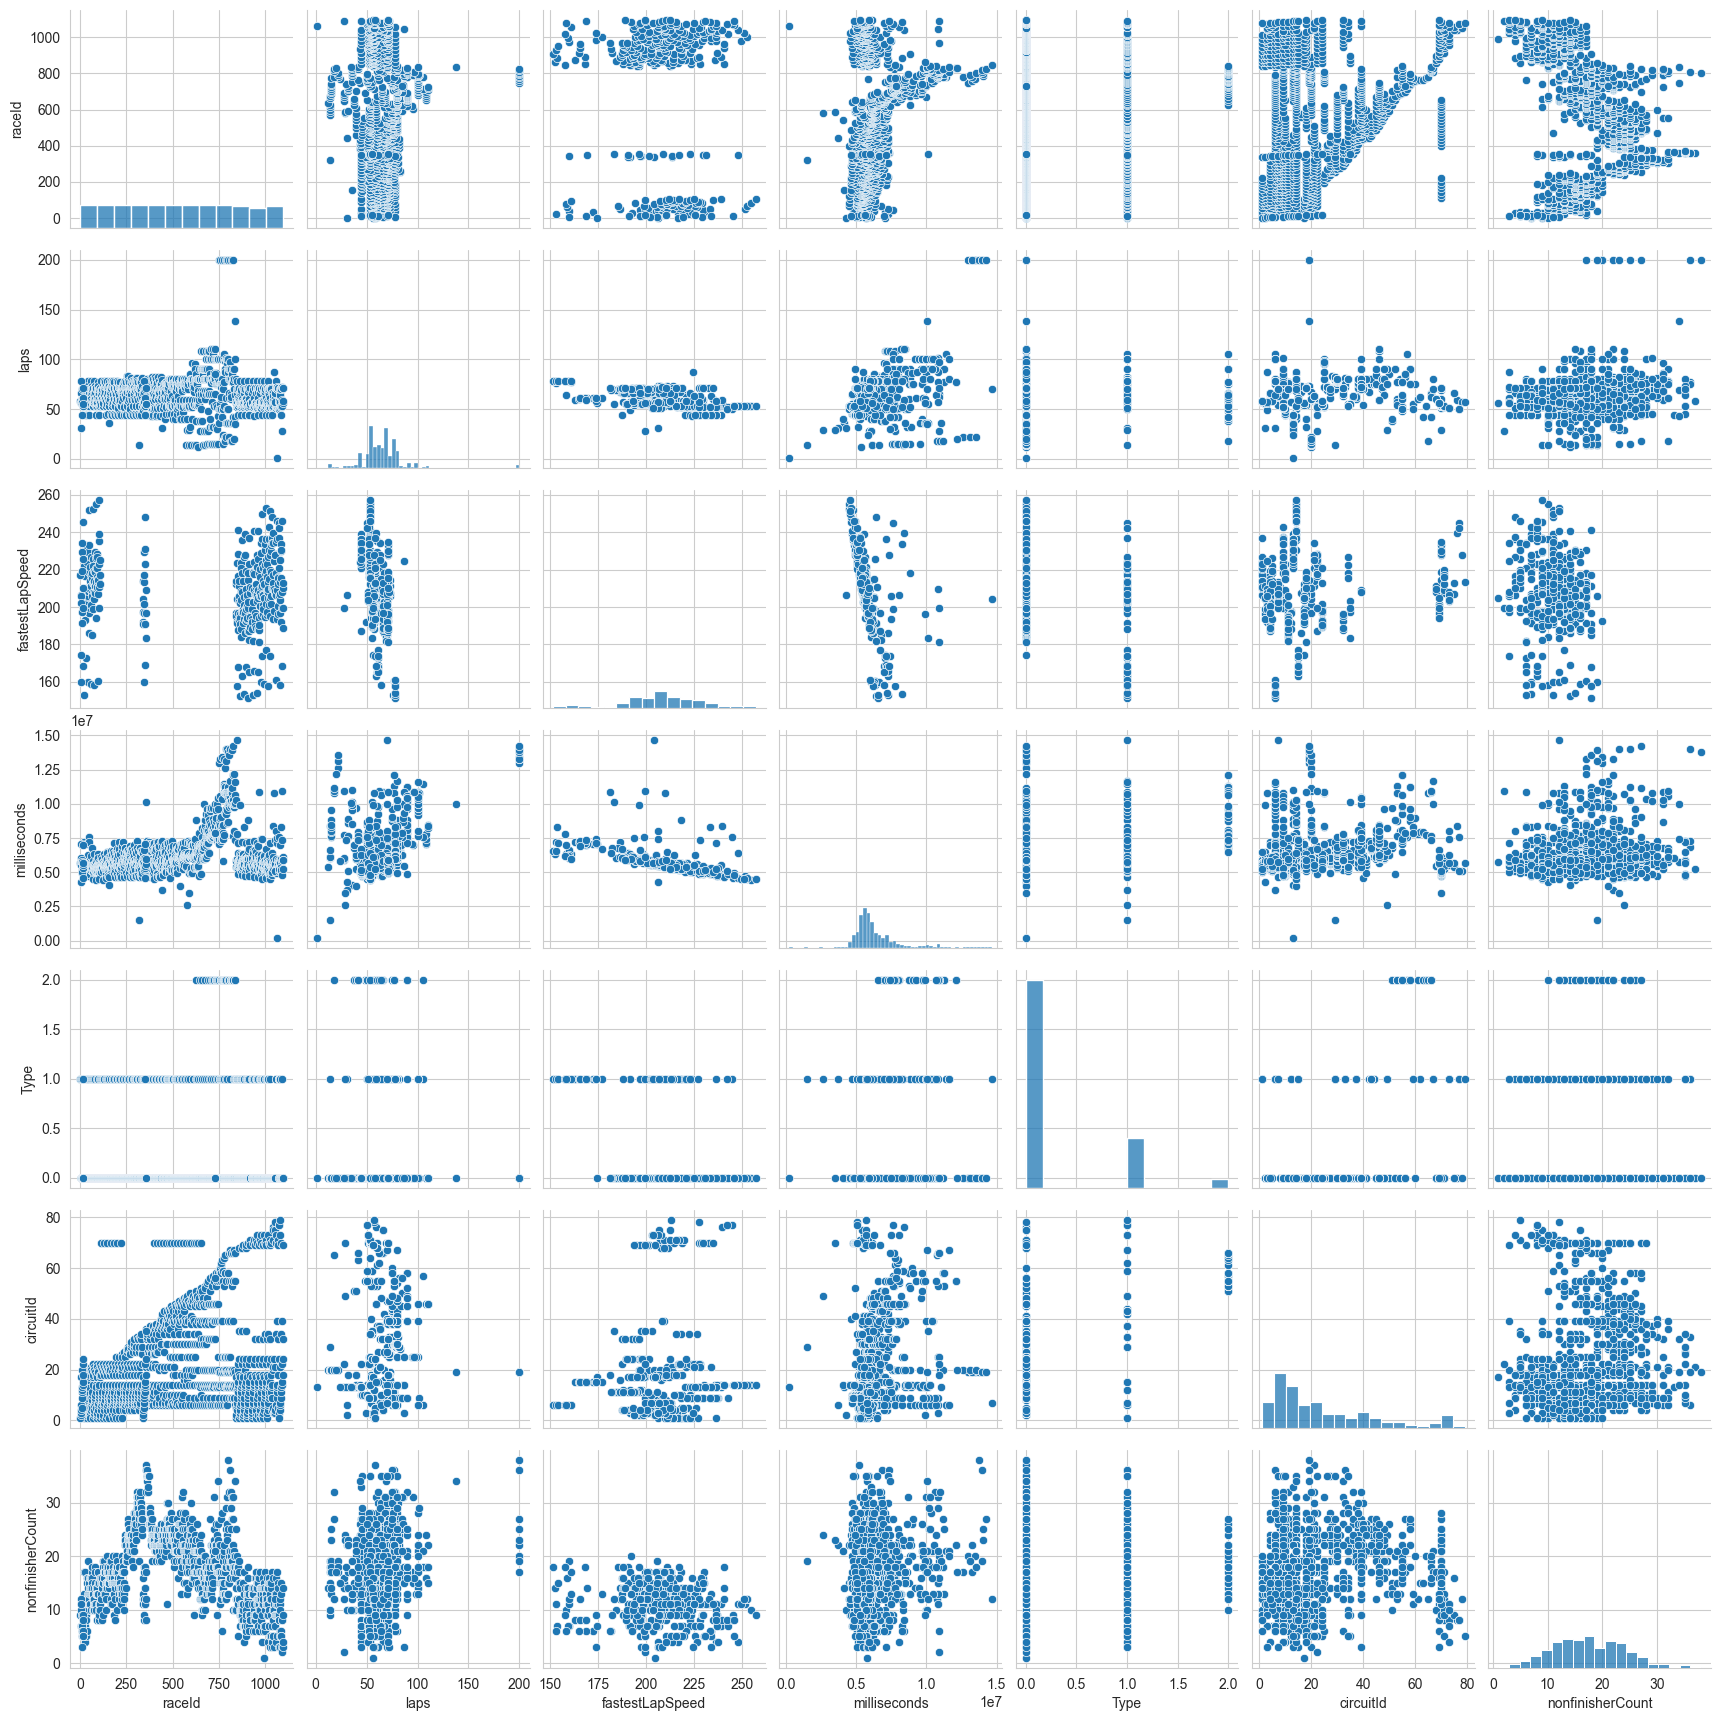

In [15]:
sns.pairplot(df_gt)

In [16]:
df_gt.isna().sum()

raceId                0
laps                  0
fastestLapSpeed     717
milliseconds          0
Type                  0
circuitId             0
nonfinisherCount      1
dtype: int64

In [17]:
df_gt = df_gt.dropna()
#df_gt = df_gt.drop("fastestLapSpeed",axis=1)

In [18]:
X = df_gt[["raceId","laps","nonfinisherCount",
            "milliseconds","circuitId","fastestLapSpeed"]].to_numpy()
y = df_gt[["Type"]].to_numpy()

In [19]:
print(X.shape)
print(y.shape)

(365, 6)
(365, 1)


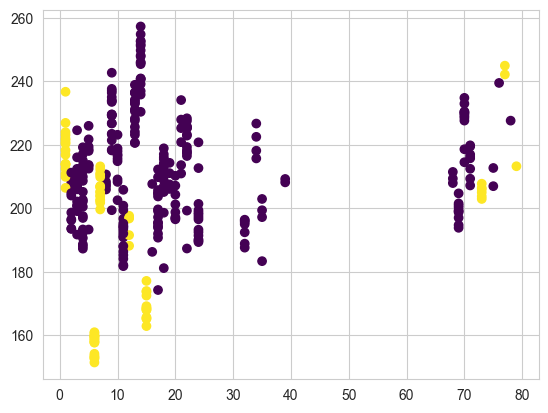

In [20]:
plt.scatter(X[:,4],X[:,5],c=y, cmap="viridis")

In [21]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
X_std

array([[-1.53664708, -0.28672289,  1.5811666 , -0.1095973 , -0.88952063,
         0.51332697],
       [-1.5342823 , -0.51324638, -0.01163692, -0.32312455, -0.84170398,
         0.07034665],
       [-1.53191752, -0.39998464, -0.01163692, -0.33478965, -0.79388733,
         0.02164886],
       ...,
       [ 1.00785633,  1.18567983,  0.78476484,  0.11807911,  0.59279541,
        -0.91368794],
       [ 1.01022111,  1.18567983, -1.86990769,  0.11537555, -0.07663764,
         0.12263016],
       [ 1.01258589, -0.28672289, -0.54257143, -0.53723581,  0.21026224,
         0.24081316]])

How did our Clustering Algo Do?


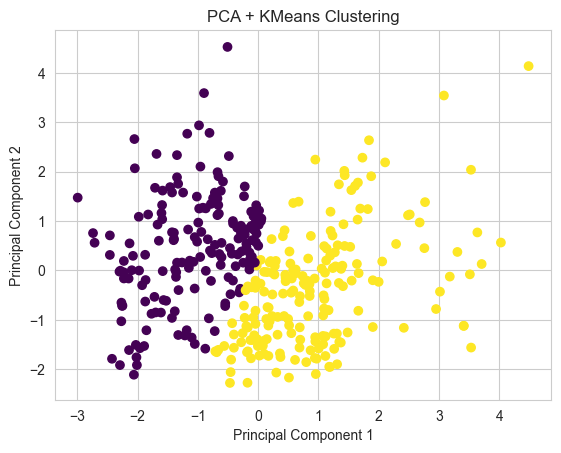

How does it map to real-life? - Not well


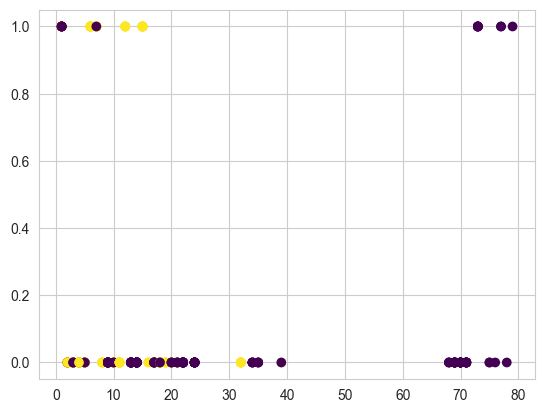

In [22]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(X_pca)

# Visualization
print("How did our Clustering Algo Do?")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA + KMeans Clustering')
plt.show()

print("How does it map to real-life? - Not well")
plt.scatter(X[:,4],y, c=clusters, cmap='viridis')
plt.show()

## Let's try Segmentation using Pitstops

In [23]:
# Load and review Race detail information
pit_stops_df = pd.read_csv("data/pit_stops.csv")
print("Pit Stops")
display(pit_stops_df)
display(pit_stops_df.describe().T)

Pit Stops


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
9629,1096,849,2,38,18:02:50,25.174,25174
9630,1096,840,2,40,18:04:44,21.802,21802
9631,1096,839,2,41,18:06:09,21.734,21734
9632,1096,846,2,42,18:07:36,21.559,21559


,count,mean,std,min,25%,50%,75%,max
raceId,9634.0,956.103384,76.862933,841.0,885.00,953.0,1024.00,1096.0
driverId,9634.0,513.030828,391.682304,1.0,18.00,815.0,830.00,856.0
stop,9634.0,1.760536,0.914522,1.0,1.00,2.0,2.00,6.0
lap,9634.0,25.255553,14.579838,1.0,13.00,25.0,36.00,78.0
milliseconds,9634.0,72401.730641,273833.956873,12897.0,21908.25,23557.0,26186.75,3069017.0


In [24]:
# Load and review Race detail information
races_df = pd.read_csv('data/races.csv')
print("Races")
display(races_df)
display(races_df.describe().T)

Races


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1116,2023,19,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1098,1117,2023,20,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1099,1118,2023,21,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1100,1119,2023,22,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


,count,mean,std,min,25%,50%,75%,max
raceId,1102.0,553.853902,321.706151,1.0,276.25,551.5,826.75,1120.0
year,1102.0,1992.049002,20.308639,1950.0,1976.00,1994.0,2010.00,2023.0
round,1102.0,8.507260,5.097545,1.0,4.00,8.0,12.00,23.0
circuitId,1102.0,23.697822,19.337398,1.0,9.00,18.0,34.00,80.0


In [25]:
seg_pit_df = pd.merge(pit_stops_df,
                      races_circuits_df[['raceId','year','circuitId',"Type"]],
                      on = 'raceId')
seg_pit_df

,raceId,driverId,stop,lap,time,duration,milliseconds,year,circuitId,Type
0,841,153,1,1,17:05:23,26.898,26898,2011,1,Street circuit
1,841,30,1,1,17:05:52,25.021,25021,2011,1,Street circuit
2,841,17,1,11,17:20:48,23.426,23426,2011,1,Street circuit
3,841,4,1,12,17:22:34,23.251,23251,2011,1,Street circuit
4,841,13,1,13,17:24:10,23.842,23842,2011,1,Street circuit
...,...,...,...,...,...,...,...,...,...,...
9629,1096,849,2,38,18:02:50,25.174,25174,2022,24,Race circuit
9630,1096,840,2,40,18:04:44,21.802,21802,2022,24,Race circuit
9631,1096,839,2,41,18:06:09,21.734,21734,2022,24,Race circuit
9632,1096,846,2,42,18:07:36,21.559,21559,2022,24,Race circuit


In [26]:
numeric_type(seg_pit_df)
seg_pit_df.groupby('Type').describe().T

Type                           0             1
raceId       count  7.673000e+03  1.961000e+03
             mean   9.585583e+02  9.464977e+02
             std    7.672211e+01  7.667902e+01
             min    8.420000e+02  8.410000e+02
             25%    8.880000e+02  8.730000e+02
             50%    9.560000e+02  9.480000e+02
             75%    1.029000e+03  9.940000e+02
             max    1.096000e+03  1.091000e+03
driverId     count  7.673000e+03  1.961000e+03
             mean   5.170195e+02  4.974238e+02
             std    3.909280e+02  3.943324e+02
             min    1.000000e+00  1.000000e+00
             25%    1.800000e+01  1.700000e+01
             50%    8.150000e+02  8.150000e+02
             75%    8.300000e+02  8.280000e+02
             max    8.560000e+02  8.550000e+02
stop         count  7.673000e+03  1.961000e+03
             mean   1.768409e+00  1.729730e+00
             std    9.105927e-01  9.293285e-01
             min    1.000000e+00  1.000000e+00
             25%    1.000000e+00  1.000000e+00
             50%    2.000000e+00  1.000000e+00
             75%    2.000000e+00  2.000000e+00
             max    6.000000e+00  6.000000e+00
lap          count  7.673000e+03  1.961000e+03
             mean   2.521543e+01  2.541254e+01
             std    1.455974e+01  1.466088e+01
             min    1.000000e+00  1.000000e+00
             25%    1.300000e+01  1.400000e+01
             50%    2.500000e+01  2.400000e+01
             75%    3.600000e+01  3.600000e+01
             max    7.800000e+01  7.400000e+01
milliseconds count  7.673000e+03  1.961000e+03
             mean   6.714643e+04  9.296467e+04
             std    2.685316e+05  2.928289e+05
             min    1.289700e+04  1.444600e+04
             25%    2.185600e+04  2.235600e+04
             50%    2.329400e+04  2.480100e+04
             75%    2.541900e+04  2.974200e+04
             max    3.069017e+06  2.048175e+06
year         count  7.673000e+03  1.961000e+03
             mean   2.016124e+03  2.015682e+03
             std    3.562165e+00  3.571791e+00
             min    2.011000e+03  2.011000e+03
             25%    2.013000e+03  2.012000e+03
             50%    2.016000e+03  2.016000e+03
             75%    2.019000e+03  2.018000e+03
             max    2.022000e+03  2.022000e+03
circuitId    count  7.673000e+03  1.961000e+03
             mean   2.269269e+01  1.965732e+01
             std    2.214298e+01  2.523681e+01
             min    2.000000e+00  1.000000e+00
             25%    9.000000e+00  6.000000e+00
             50%    1.700000e+01  7.000000e+00
             75%    2.400000e+01  1.500000e+01
             max    7.800000e+01  7.900000e+01

In [27]:
def time_to_seconds(t):
    """
    Returns time from midnight
    :param t: Time String formatted as HH:MM:SS
    :return: seconds
    """
    hours, minutes, seconds = map(int, t.split(':'))
    return hours * 3600 + minutes * 60 + seconds


In [28]:
seg_pit_df['time'] = seg_pit_df['time'].apply(time_to_seconds)

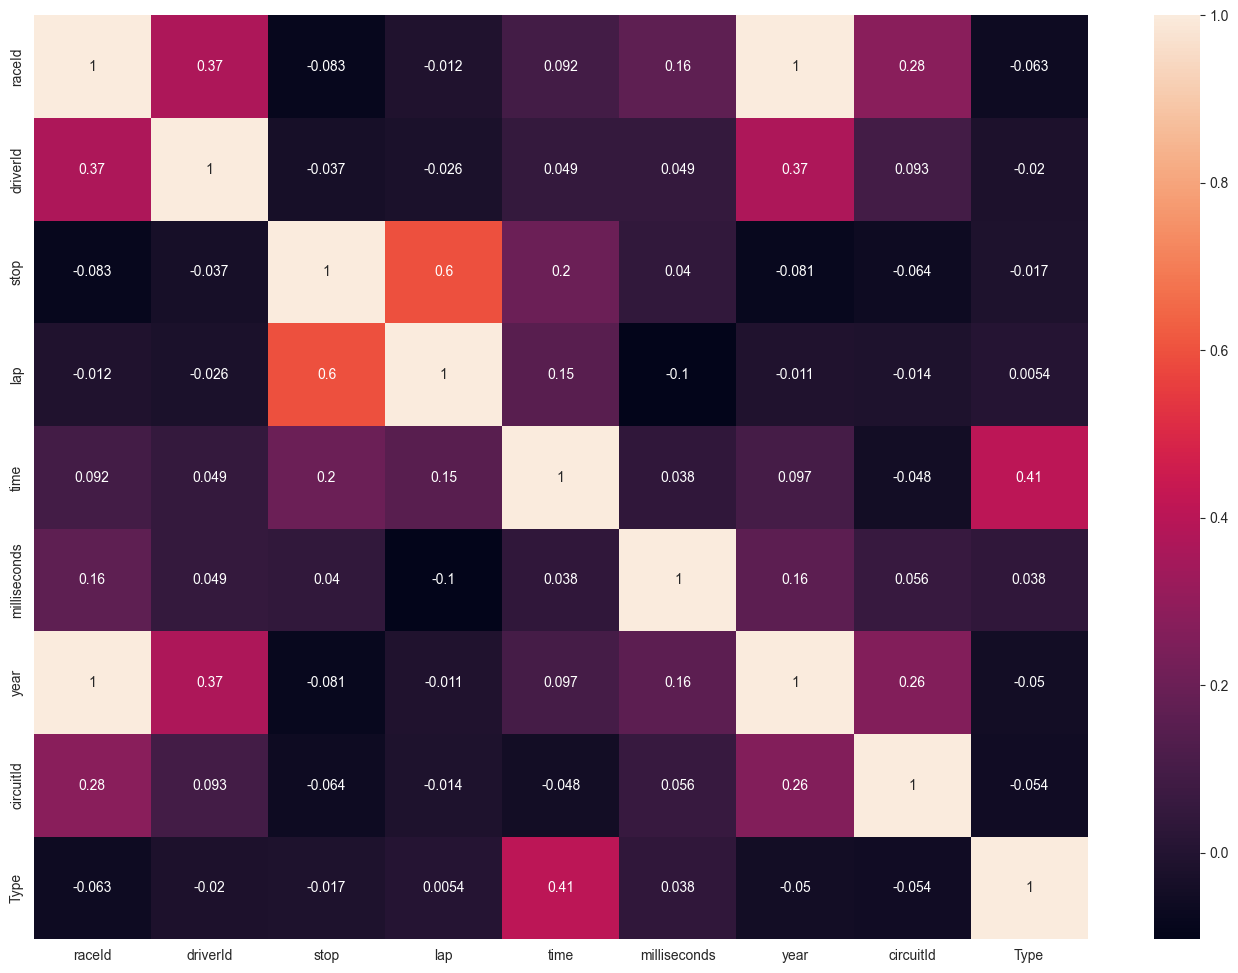

In [29]:
seg_pit_df = seg_pit_df.drop('duration',axis=1)
plt.figure(figsize=(17,12))
sns.heatmap(seg_pit_df.corr(),annot=True)
plt.show()

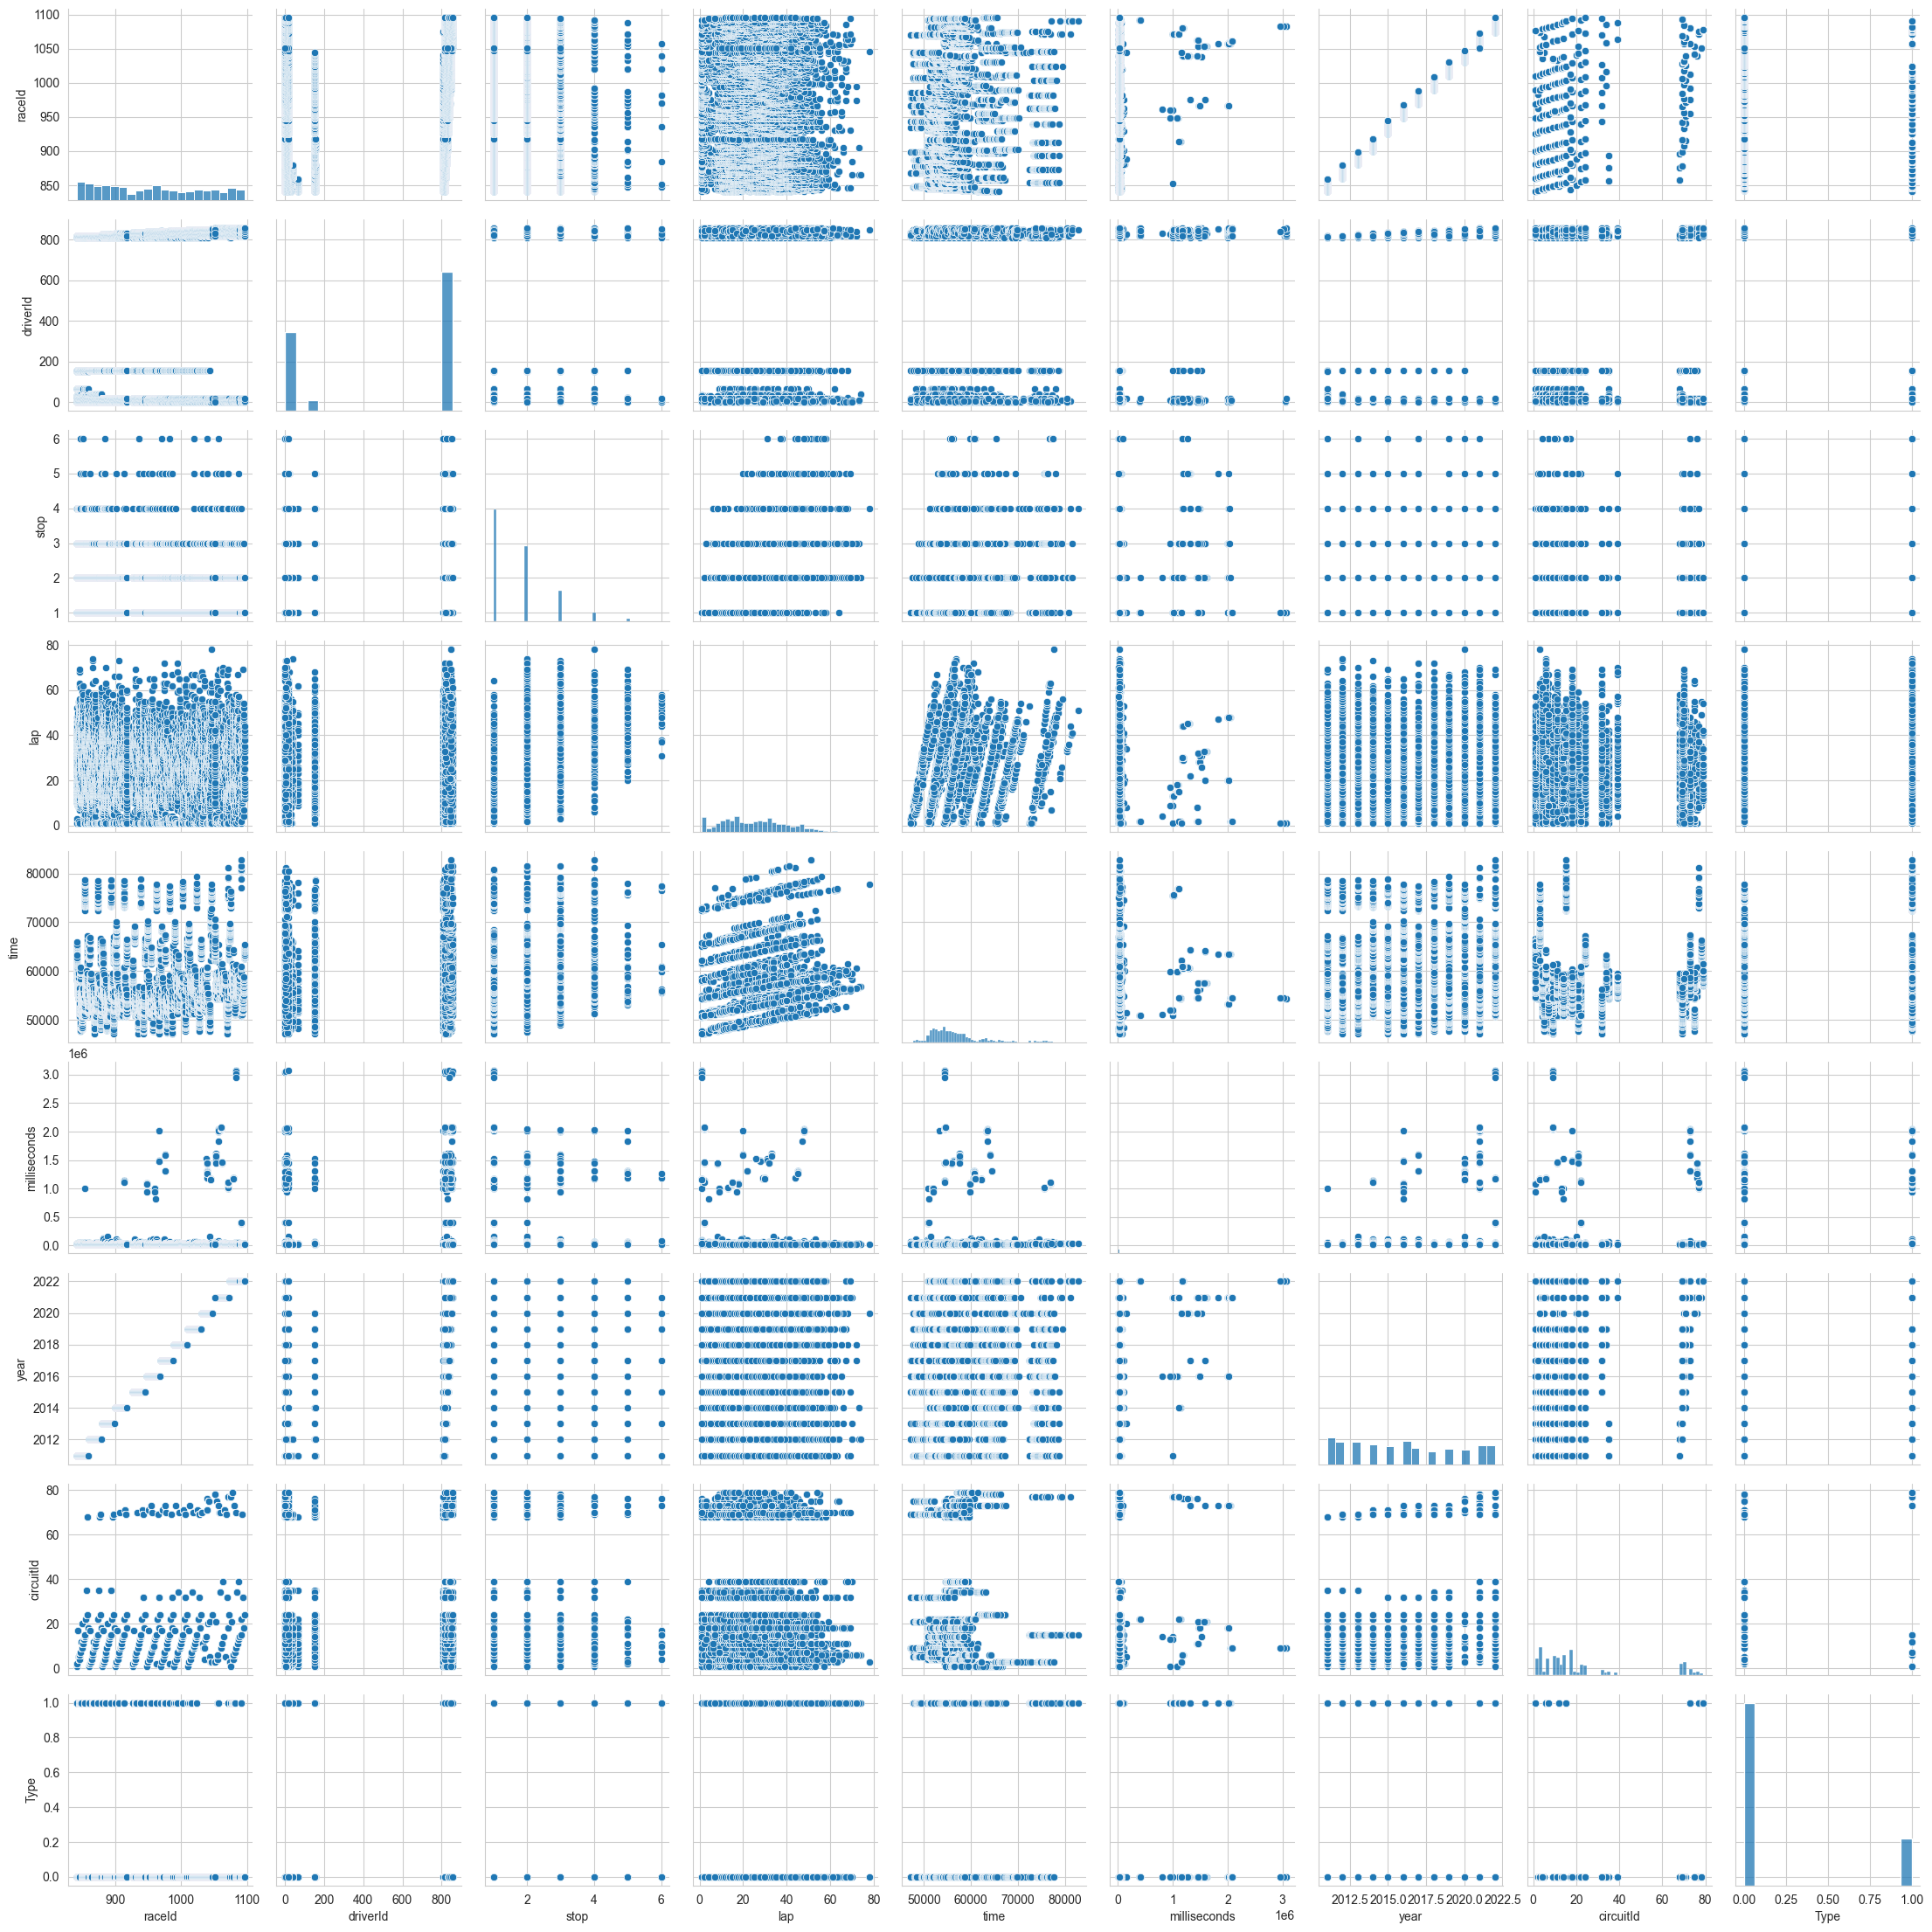

In [30]:
sns.pairplot(seg_pit_df)

In [31]:
seg_pit_df.isna().sum()

raceId          0
driverId        0
stop            0
lap             0
time            0
milliseconds    0
year            0
circuitId       0
Type            0
dtype: int64

In [32]:
X_pit = seg_pit_df.drop('Type',axis=1).values
y_pit = seg_pit_df['Type']

How did our Clustering Algo Do?


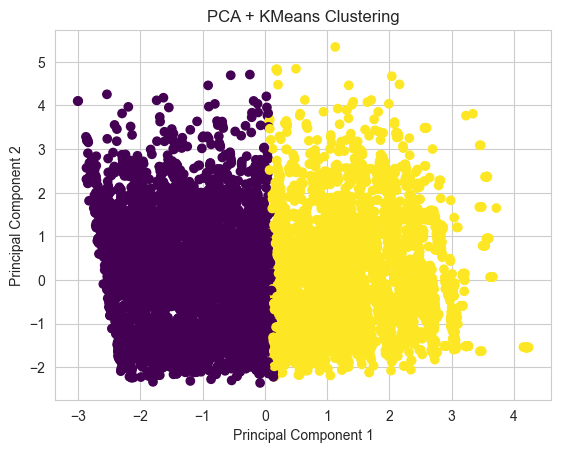

How does it map to real-life? - Not well


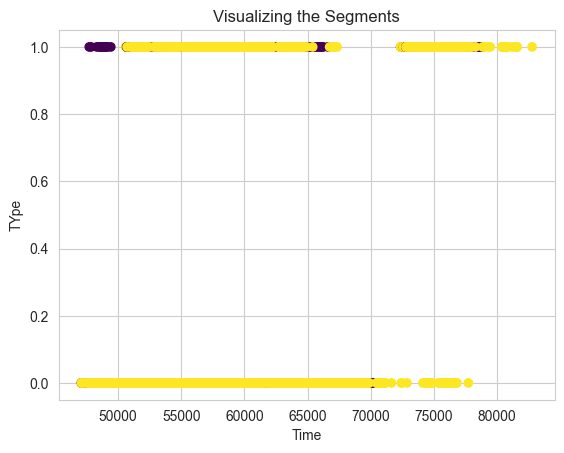

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

X_pit_std = StandardScaler().fit_transform(X_pit)
pca = PCA(n_components=2)
X_pit_pca = pca.fit_transform(X_pit_std)

kmeans_pit = KMeans(n_clusters=2)
clusters_pit = kmeans_pit.fit_predict(X_pit_pca)

# Visualization
print("How did our Clustering Algo Do?")
plt.scatter(X_pit_pca[:, 0], X_pit_pca[:, 1], c=clusters_pit, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA + KMeans Clustering')
plt.show()

print("How does it map to real-life? - Not well")
plt.scatter(X_pit[:, 4], y_pit, c=clusters_pit, cmap='viridis')
plt.xlabel('Time')
plt.ylabel('TYpe')
plt.title('Visualizing the Segments')
plt.show()

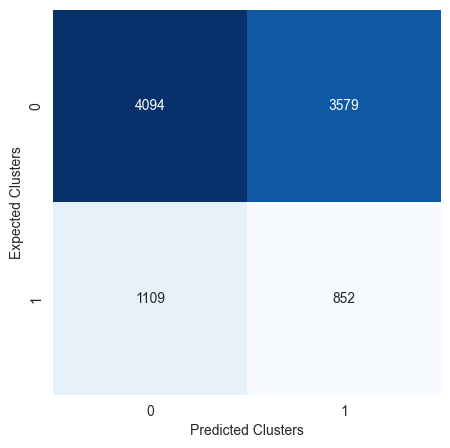

In [34]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_pit, clusters_pit)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Clusters')
plt.ylabel('Expected Clusters')
plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

#X_pit_std = StandardScaler().fit_transform(X_pit)
#pca = PCA(n_components=2)
#X_pit_pca = pca.fit_transform(X_pit_std)

# Create a DBSCAN instance and fit it to the data
dbscan_pit = DBSCAN(eps=0.5, min_samples=5)
dbs_clusters_pit = dbscan_pit.fit_predict(X_pit_pca)

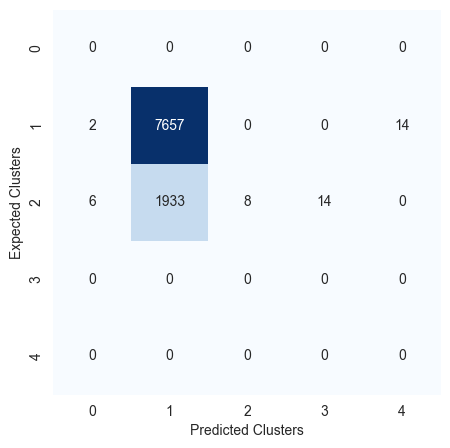

In [36]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_pit, dbs_clusters_pit)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Clusters')
plt.ylabel('Expected Clusters')
plt.show()

In [37]:
np.unique(y_pit)

array([0, 1], dtype=int64)

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering

# Create a SpectralClustering instance and fit it to the data
spectral_pit = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
spectral_clusters_pit = spectral_pit.fit_predict(X_pit_std)

In [39]:
np.unique(spectral_clusters_pit)
np.count_nonzero(spectral_clusters_pit)

98

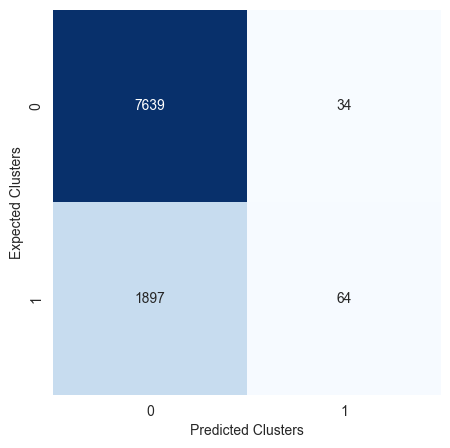

In [40]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_pit, spectral_clusters_pit)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Clusters')
plt.ylabel('Expected Clusters')
plt.show()

In [41]:
# Create a SpectralClustering instance and fit it to the data
rbf_spectral_pit = SpectralClustering(n_clusters=2, affinity='rbf')
rbf_spectral_clusters_pit = spectral_pit.fit_predict(X_pit_std)


## Let's move from Segmentation to Classification via Pit Stops

Each race track is labeled based on various characteristics like lap times, pit stop times and number of of pit stops.  Let's see if we can predict the Race Track type.

### Race details

In [56]:
pits_year_df = pd.merge(pit_stops_df,
                        races_circuits_df[['raceId','year','circuitId',"Type"]],
                        on = 'raceId')
pits_year_df

,raceId,driverId,stop,lap,time,duration,milliseconds,year,circuitId,Type
0,841,153,1,1,17:05:23,26.898,26898,2011,1,Street circuit
1,841,30,1,1,17:05:52,25.021,25021,2011,1,Street circuit
2,841,17,1,11,17:20:48,23.426,23426,2011,1,Street circuit
3,841,4,1,12,17:22:34,23.251,23251,2011,1,Street circuit
4,841,13,1,13,17:24:10,23.842,23842,2011,1,Street circuit
...,...,...,...,...,...,...,...,...,...,...
9629,1096,849,2,38,18:02:50,25.174,25174,2022,24,Race circuit
9630,1096,840,2,40,18:04:44,21.802,21802,2022,24,Race circuit
9631,1096,839,2,41,18:06:09,21.734,21734,2022,24,Race circuit
9632,1096,846,2,42,18:07:36,21.559,21559,2022,24,Race circuit


In [57]:
numeric_type(pits_year_df)
pits_year_df

,raceId,driverId,stop,lap,time,duration,milliseconds,year,circuitId,Type
0,841,153,1,1,17:05:23,26.898,26898,2011,1,1
1,841,30,1,1,17:05:52,25.021,25021,2011,1,1
2,841,17,1,11,17:20:48,23.426,23426,2011,1,1
3,841,4,1,12,17:22:34,23.251,23251,2011,1,1
4,841,13,1,13,17:24:10,23.842,23842,2011,1,1
...,...,...,...,...,...,...,...,...,...,...
9629,1096,849,2,38,18:02:50,25.174,25174,2022,24,0
9630,1096,840,2,40,18:04:44,21.802,21802,2022,24,0
9631,1096,839,2,41,18:06:09,21.734,21734,2022,24,0
9632,1096,846,2,42,18:07:36,21.559,21559,2022,24,0


In [58]:
yr_df = pits_year_df
print("No. of Races:", len(yr_df.raceId.unique()))

No. of Races: 239


In [61]:
yr_df.dtypes
yr_df = yr_df.drop('duration',axis=1)

In [63]:
# Apply the function to the 'time' column
yr_df['time'] = yr_df['time'].apply(time_to_seconds)

array([1, 0], dtype=int64)

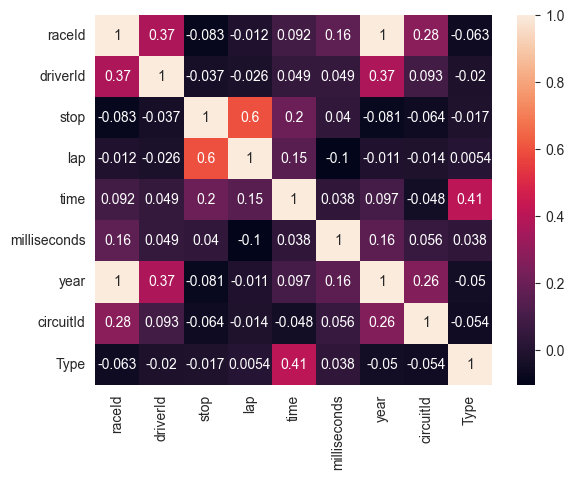

In [67]:
sns.heatmap(yr_df.corr(),annot=True)
yr_df['Type'].unique()

In [68]:
yr_df.isna().sum()

raceId          0
driverId        0
stop            0
lap             0
time            0
milliseconds    0
year            0
circuitId       0
Type            0
dtype: int64

In [69]:
# Lets create our training data sets
X = yr_df.drop(columns=['Type']).values
y = yr_df['Type']

# ML Algorithms

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import tree

In [71]:
# Create our train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
stdsc = StandardScaler().fit(X_train)
X_train_std = stdsc.transform(X_train)
X_test_std = stdsc.transform(X_test)

In [72]:
# classification ML algorithms
lr = LogisticRegression(solver='sag')
dt = DecisionTreeClassifier()
rn = RandomForestClassifier()
knn = KNeighborsClassifier()
gb = GaussianNB()
sgd = SGDClassifier()

In [73]:
models = [lr,sgd,knn,gb,rn,dt]
for m in models:
    m.fit(X_train_std,y_train)
    y_pred = m.predict(X_test_std)
    print(m,":",accuracy_score(y_pred,y_test)*100)

LogisticRegression(solver='sag') : 82.92682926829268
SGDClassifier() : 81.57758173326414
KNeighborsClassifier() : 93.56512714063311
GaussianNB() : 81.26621691748832
RandomForestClassifier() : 100.0
DecisionTreeClassifier() : 100.0


In [74]:
rn_pred = rn.predict(X_test_std)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1544
           1       1.00      1.00      1.00       383

    accuracy                           1.00      1927
   macro avg       1.00      1.00      1.00      1927
weighted avg       1.00      1.00      1.00      1927

